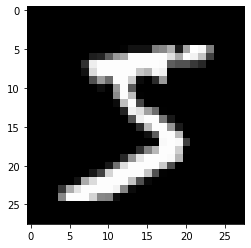

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap="gray")

In [2]:
x_train[0].shape

(28, 28)

In [3]:
28*28

784

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# rescale to between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
encoder_input_conv = keras.Input(shape=(28,28,1), name='img')

x = keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu")(encoder_input_conv)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu")(x)
encoder_output_conv = keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)


encoder = keras.Model(encoder_input_conv, encoder_output_conv, name='encoder')

decoder_input_conv = keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu")(encoder_output_conv)
x = keras.layers.UpSampling2D(size=(2, 2))(decoder_input_conv)
x = keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu")(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
decoder_output_conv = keras.layers.Conv2D(1, (3, 3), padding="same", activation="relu")(x)

autoencoder_conv = keras.Model(encoder_input_conv, decoder_output_conv, name='autoencoder_conv')


optimizer = keras.optimizers.Adam()

autoencoder_conv.compile(optimizer, loss='mse')
autoencoder_conv.summary()

Model: "autoencoder_conv"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 8)    

In [17]:
encoder_input_dense = keras.Input(shape=(28,28,1), name='img')
x = keras.layers.Flatten()(encoder_input_dense)
x = keras.layers.Dense(256)(x)
encoder_output_dense = keras.layers.Dense(128)(x)

encoder_dense = keras.Model(encoder_input_dense, encoder_output_dense, name='encoder')

decoder_input_dense = keras.layers.Dense(256)(encoder_output_dense)
x = keras.layers.Dense(784, activation='relu')(decoder_input_dense)
decoder_output_dense = keras.layers.Reshape((28,28,1))(x)

autoencoder_dense = keras.Model(encoder_input_dense, decoder_output_dense, name='autoencoder')

optimizer = keras.optimizers.Adam()
autoencoder_dense.compile(optimizer, loss='mse')
autoencoder_dense.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         

In [ ]:
encoder.summary()

In [21]:
autoencoder_conv.fit(x_train, x_train, epochs=10, batch_size=64, validation_split=.15)

Epoch 1/10
797/797 [==============================] - 25s 32ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 2/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 3/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 4/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 6/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 7/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 8/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/10
797/797 [==============================] - 25s 31ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 10/10
797/797 [==============================] - 25s 31ms/step - loss: 0.003

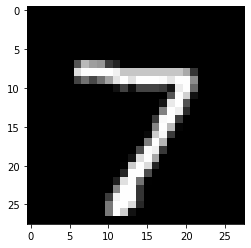

In [10]:
plt.imshow(x_test[0], cmap='gray')

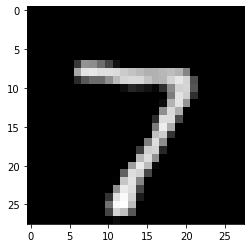

In [12]:
example = autoencoder_conv.predict([x_test[0].reshape(-1,28,28,1)])[0]
example.shape
plt.imshow(example, cmap='gray')

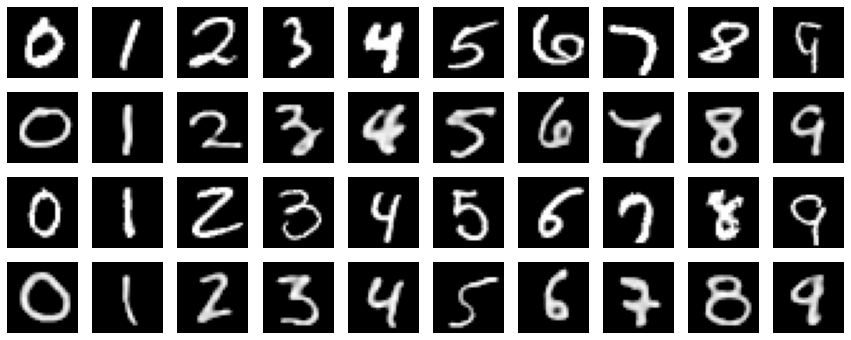

In [22]:
fig, axis = plt.subplots(nrows=4, ncols=10)
fig.set_size_inches(15,6)
test_index = 0
for i in range (4):
    for j in range(10):
        while(y_test[test_index] != j):
            test_index += 1
        axis[i,j].axis('off')
        if i%2==0:
            axis[i,j].imshow(x_test[test_index], cmap='gray')
        else:
            pred = autoencoder_conv.predict([x_test[test_index].reshape(-1,28,28,1)])[0]
            axis[i,j].imshow(pred, cmap='gray')
